# Regression problem on diabetes dataset from sklearn

## Will be using ANN to resolve this problem

In [1]:
# Load the starter modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_diabetes

In [2]:
# Load the diabetes dataset in an object and check the data
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
# Find the dependent, independent features, and also the column names
data.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [4]:
data.target[0]

151.0

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
print(data.DESCR, end='\n')

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
# Create the complete dataframe
# First read the independent features
df = pd.DataFrame(data.data, columns=[data.feature_names])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
df['target'] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [9]:
# Check the column names
df.columns

MultiIndex([(   'age',),
            (   'sex',),
            (   'bmi',),
            (    'bp',),
            (    's1',),
            (    's2',),
            (    's3',),
            (    's4',),
            (    's5',),
            (    's6',),
            ('target',)],
           )

In [10]:
# The column names are tuples for some weird reason, let's fix them
df.columns = [t[0] for t in df.columns]
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

Shape of your Data Set loaded: (442, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 55


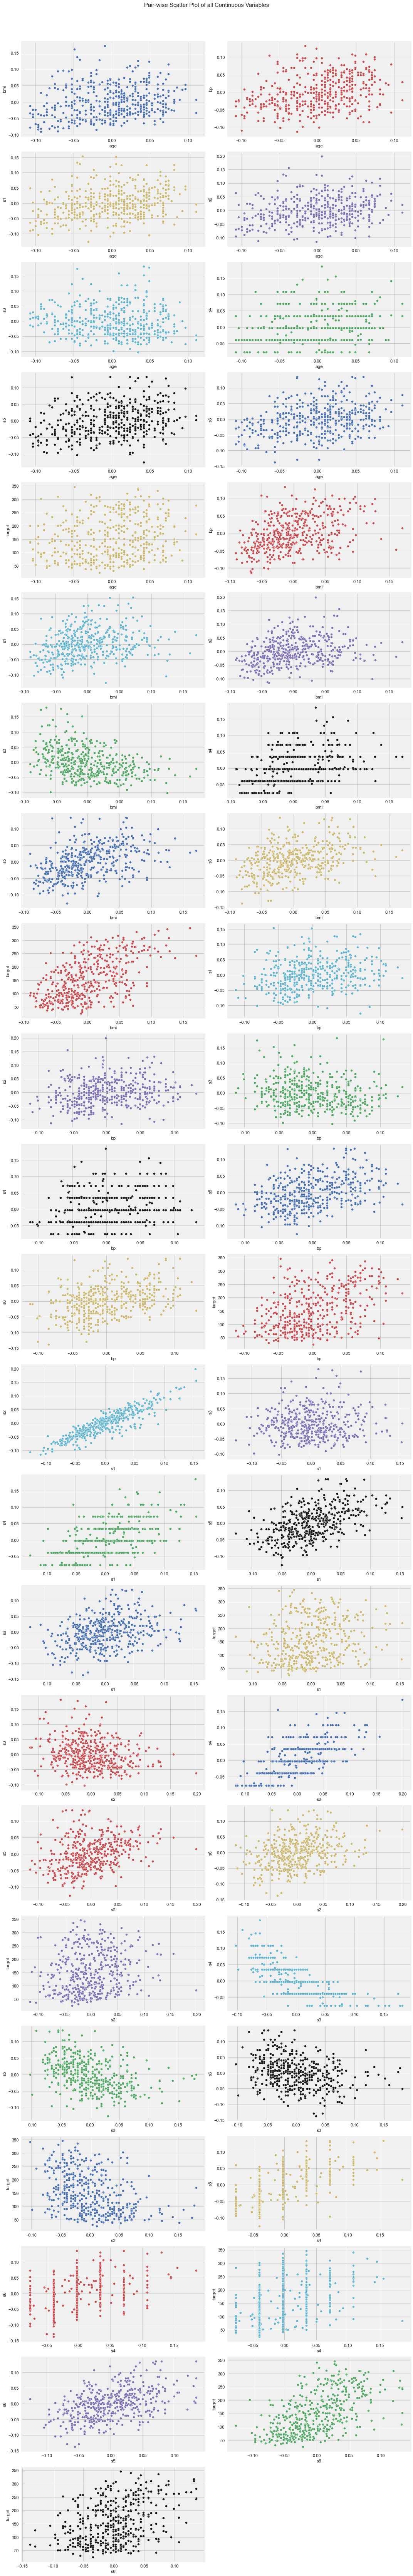

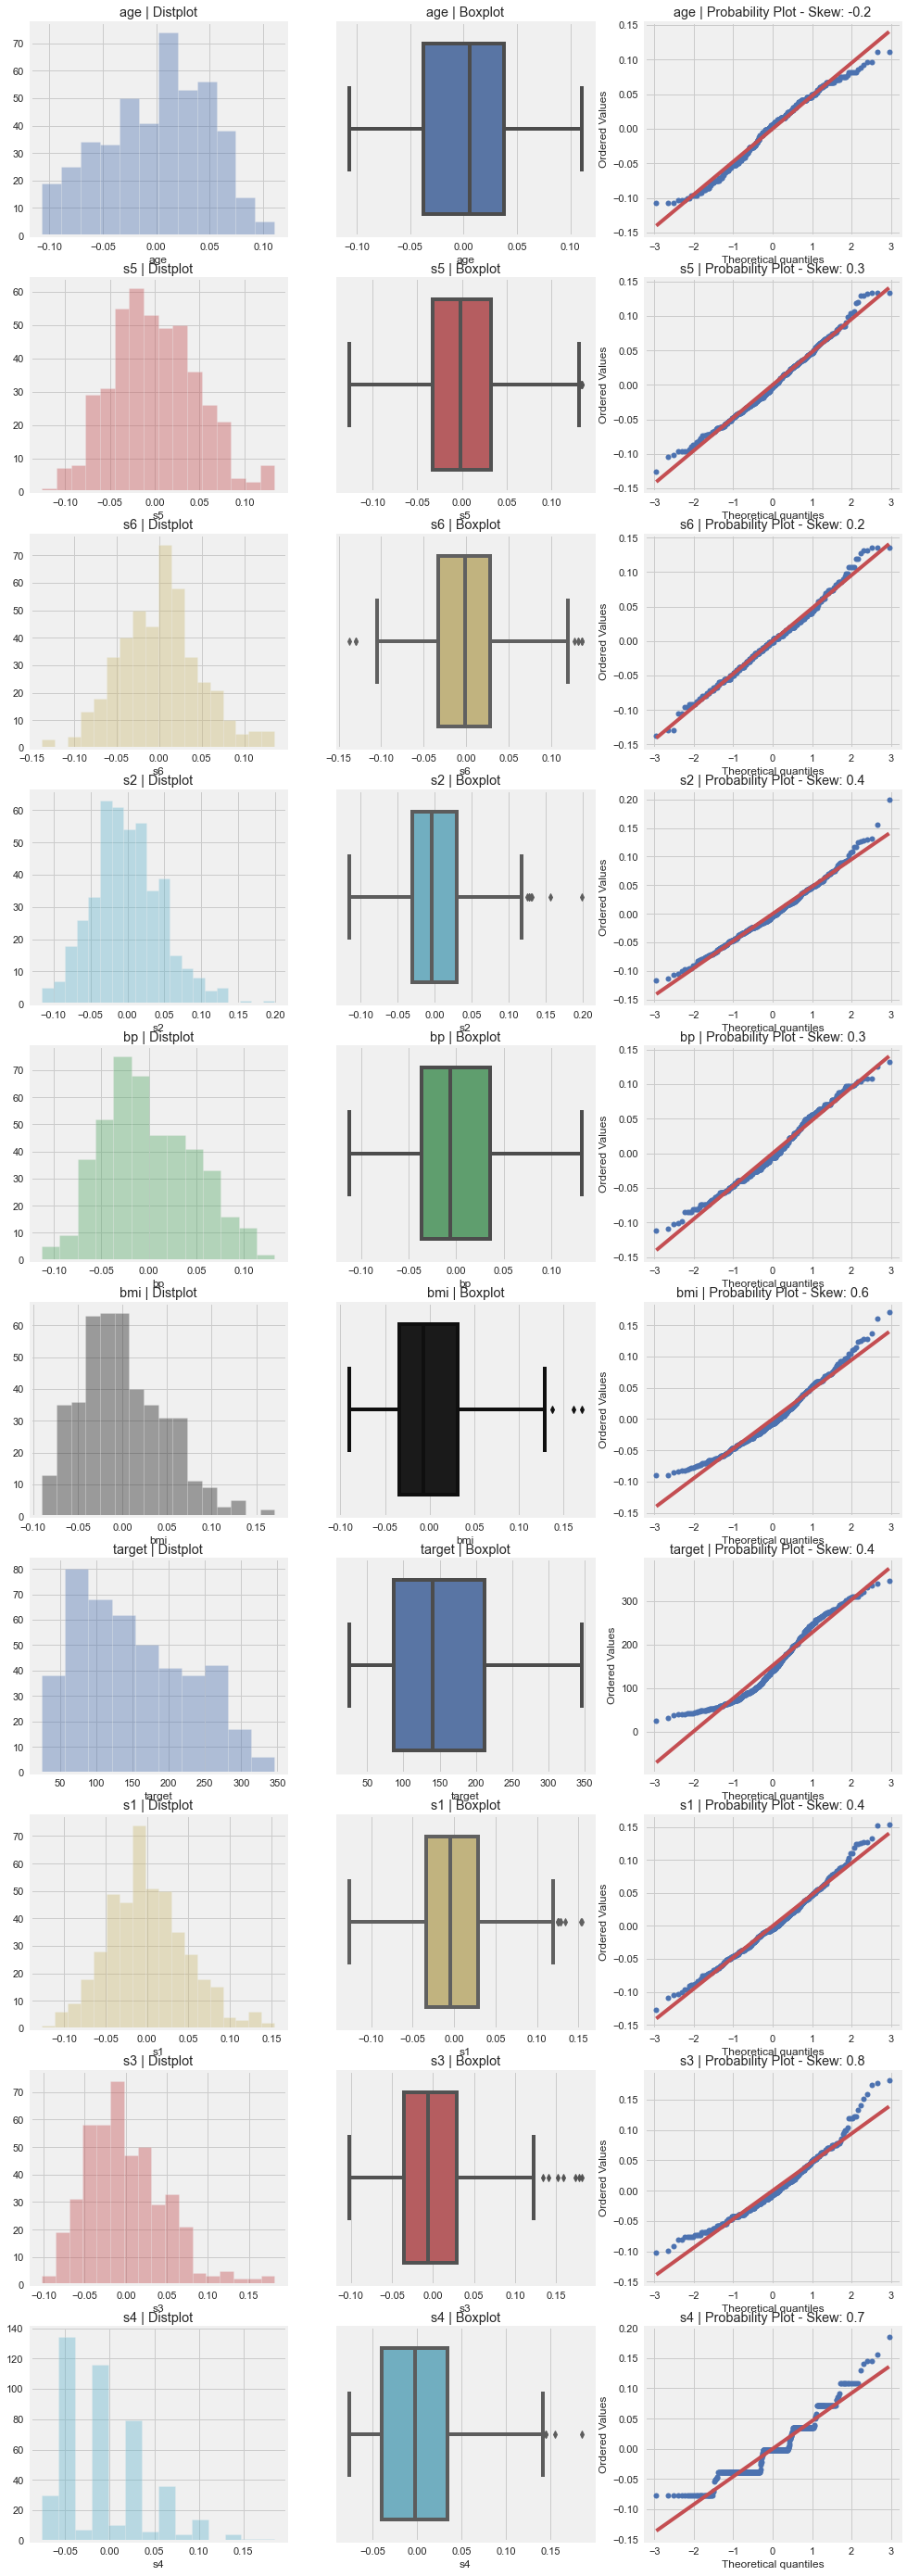

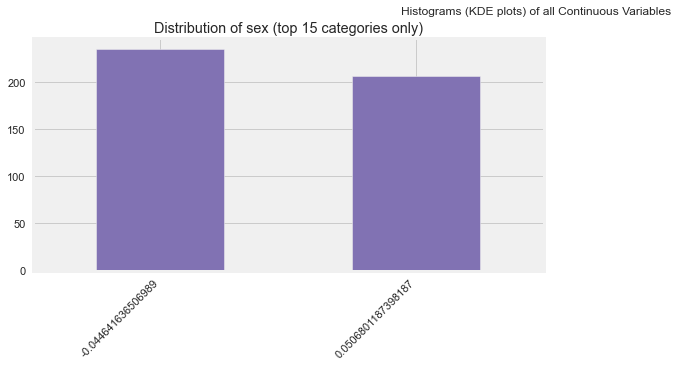

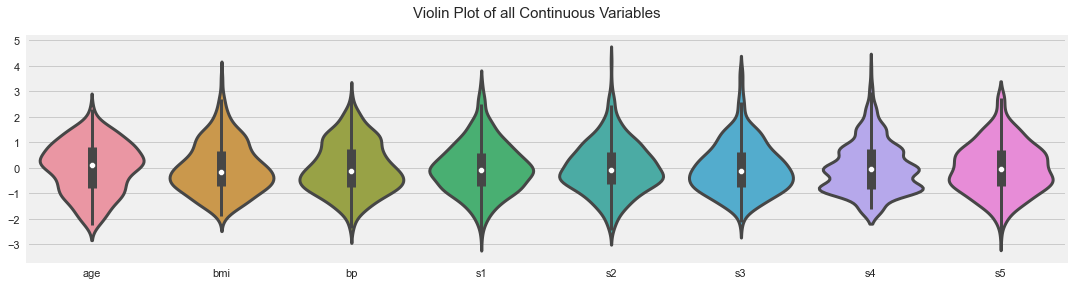

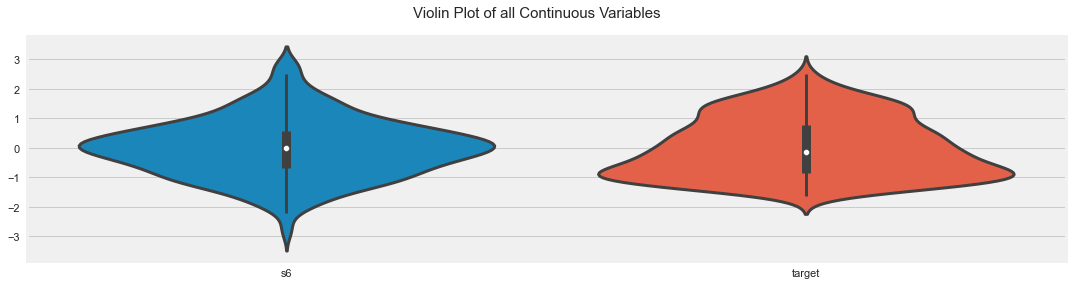

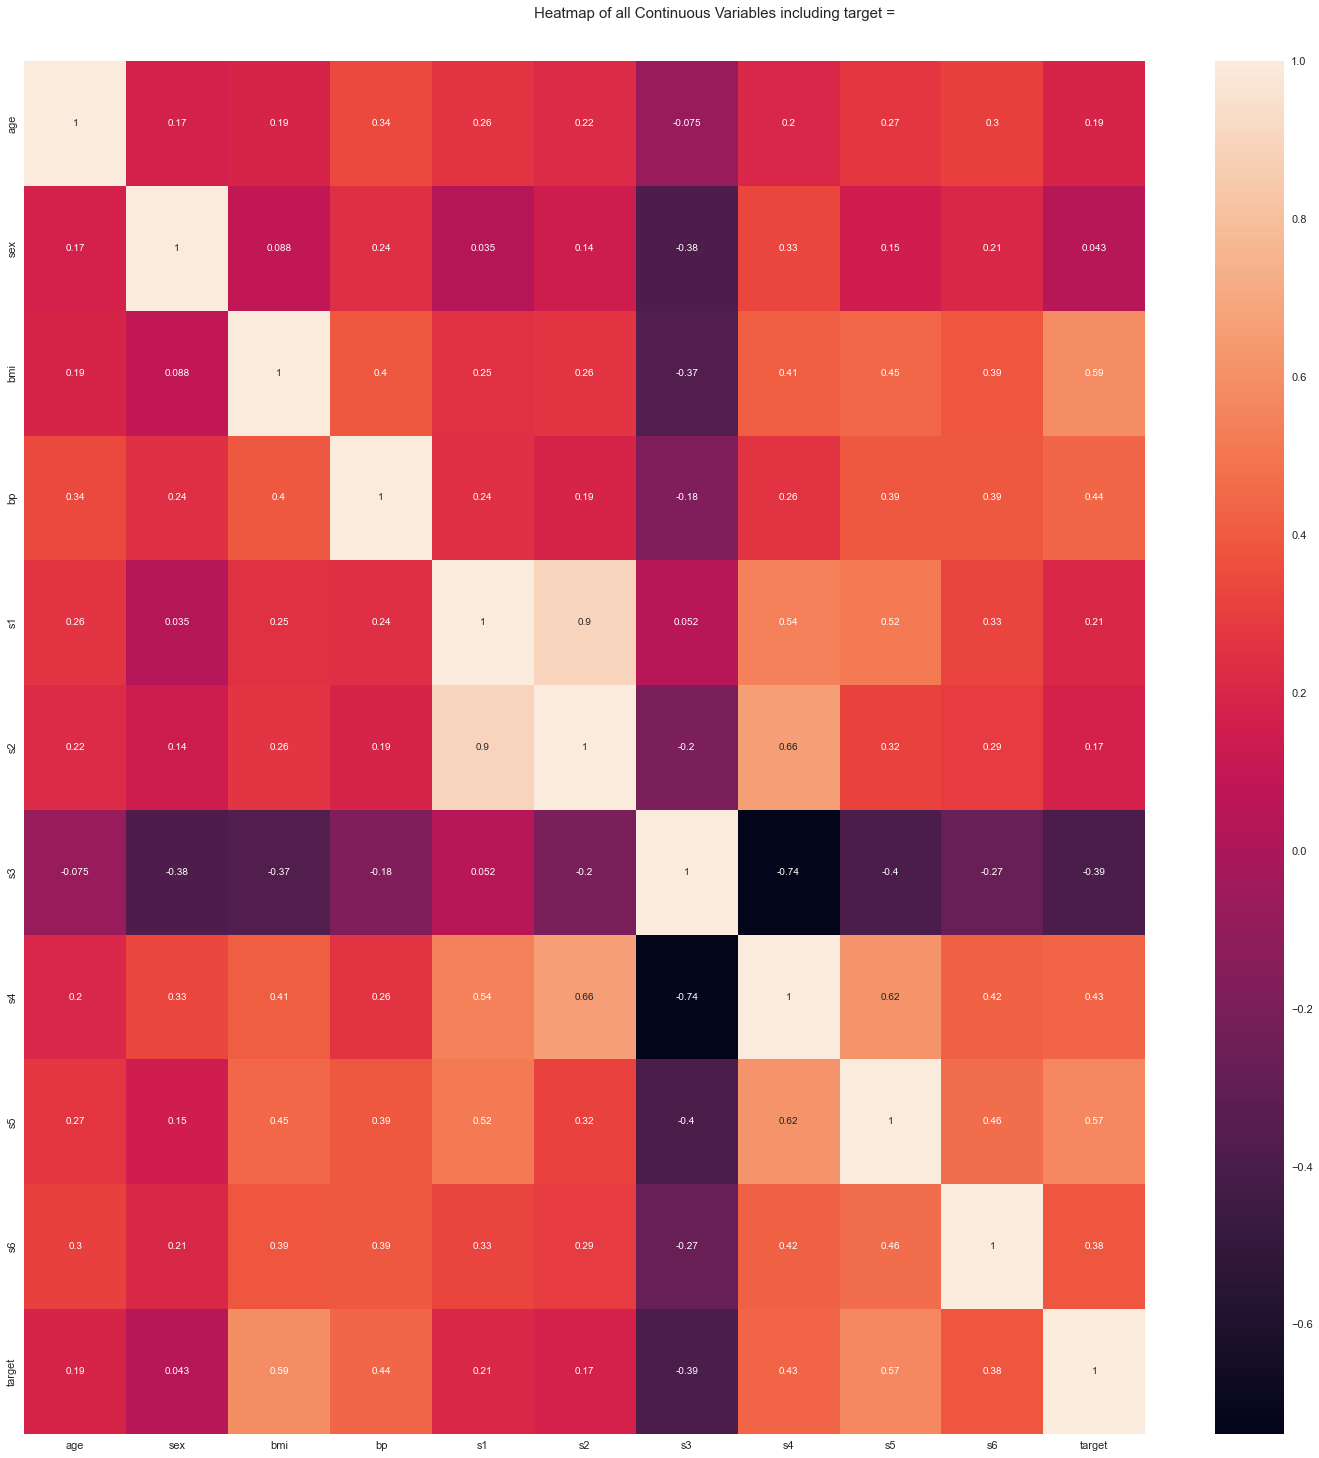

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz = 28 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [12]:
# Let's use the autoviz module for preliminary analysis
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
df.to_csv('temp1.csv', index=False)
filename = 'temp1.csv'
AV = AutoViz_Class()
dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)

In [13]:
# We observe above that most of the numerical features are already standardized and encoded
# So we will begin the regression process

In [14]:
df.head(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0


In [15]:
# Split the data into dependent and independent
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X.iloc[0], y.iloc[0]

(age    0.038076
 sex    0.050680
 bmi    0.061696
 bp     0.021872
 s1    -0.044223
 s2    -0.034821
 s3    -0.043401
 s4    -0.002592
 s5     0.019908
 s6    -0.017646
 Name: 0, dtype: float64,
 151.0)

In [16]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Import all needed libraries and sublibraries

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn.preprocessing import scale    # We don't need this in our project
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Epoch 1/100
9/9 [==============================] - 1s 80ms/step - loss: 32052.4947 - mean_absolute_error: 159.5387 - val_loss: 22384.2246 - val_mean_absolute_error: 133.7041
Epoch 2/100
9/9 [==============================] - 0s 40ms/step - loss: 34696.3123 - mean_absolute_error: 167.4656 - val_loss: 22231.7051 - val_mean_absolute_error: 133.1424
Epoch 3/100
9/9 [==============================] - 0s 40ms/step - loss: 32070.2469 - mean_absolute_error: 159.7884 - val_loss: 22021.2188 - val_mean_absolute_error: 132.3712
Epoch 4/100
9/9 [==============================] - 0s 47ms/step - loss: 30085.6701 - mean_absolute_error: 154.7509 - val_loss: 21743.2539 - val_mean_absolute_error: 131.3512
Epoch 5/100
9/9 [==============================] - 0s 38ms/step - loss: 30413.4129 - mean_absolute_error: 155.1056 - val_loss: 21392.2773 - val_mean_absolute_error: 130.0550
Epoch 6/100
9/9 [==============================] - 0s 32ms/step - loss: 29593.5322 - mean_absolute_error: 153.6566 - val_loss: 209

9/9 [==============================] - 1s 81ms/step - loss: 32224.6404 - mean_absolute_error: 160.2575 - val_loss: 20171.6582 - val_mean_absolute_error: 125.4865
Epoch 2/100
9/9 [==============================] - 0s 37ms/step - loss: 27564.2434 - mean_absolute_error: 146.2421 - val_loss: 14757.5039 - val_mean_absolute_error: 102.7769
Epoch 3/100
9/9 [==============================] - 0s 43ms/step - loss: 19385.2004 - mean_absolute_error: 117.2540 - val_loss: 7763.5449 - val_mean_absolute_error: 66.2338
Epoch 4/100
9/9 [==============================] - 0s 45ms/step - loss: 10160.2550 - mean_absolute_error: 80.8143 - val_loss: 3601.7341 - val_mean_absolute_error: 47.9091
Epoch 5/100
9/9 [==============================] - 0s 35ms/step - loss: 3899.0347 - mean_absolute_error: 52.9430 - val_loss: 4504.7148 - val_mean_absolute_error: 58.2209
Epoch 6/100
9/9 [==============================] - 0s 44ms/step - loss: 4396.6460 - mean_absolute_error: 56.3110 - val_loss: 4787.6763 - val_mean_absol

Epoch 13/100
9/9 [==============================] - 1s 60ms/step - loss: 5949.6856 - mean_absolute_error: 66.5781 - val_loss: 5022.0854 - val_mean_absolute_error: 59.7067
Epoch 00013: early stopping
Epoch 1/100
9/9 [==============================] - 2s 117ms/step - loss: 1293356920.4000 - mean_absolute_error: 16553.5805 - val_loss: 147897.5625 - val_mean_absolute_error: 378.6725
Epoch 2/100
9/9 [==============================] - 0s 52ms/step - loss: 203957.6031 - mean_absolute_error: 442.5992 - val_loss: 254478.8750 - val_mean_absolute_error: 499.9742
Epoch 3/100
9/9 [==============================] - 0s 44ms/step - loss: 290149.9313 - mean_absolute_error: 532.7791 - val_loss: 287104.1562 - val_mean_absolute_error: 531.6008
Epoch 4/100
9/9 [==============================] - 0s 50ms/step - loss: 318228.4250 - mean_absolute_error: 557.9816 - val_loss: 277790.4375 - val_mean_absolute_error: 522.7673
Epoch 5/100
9/9 [==============================] - 0s 47ms/step - loss: 302095.8281 - mean

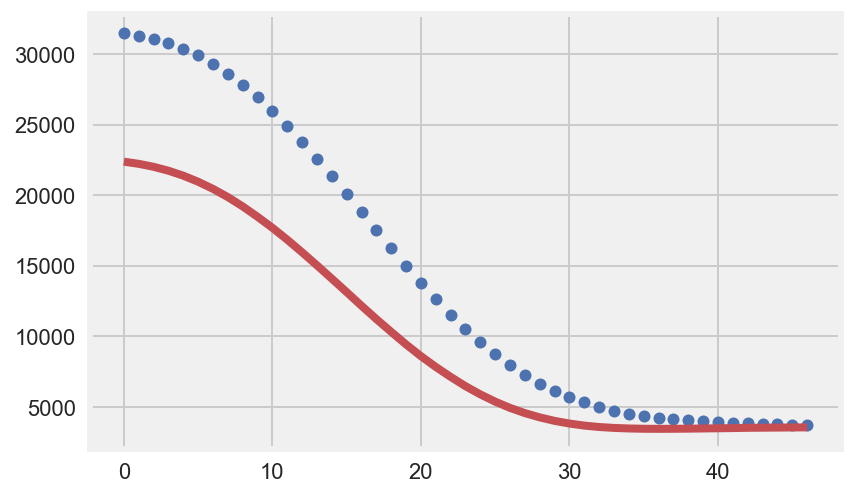

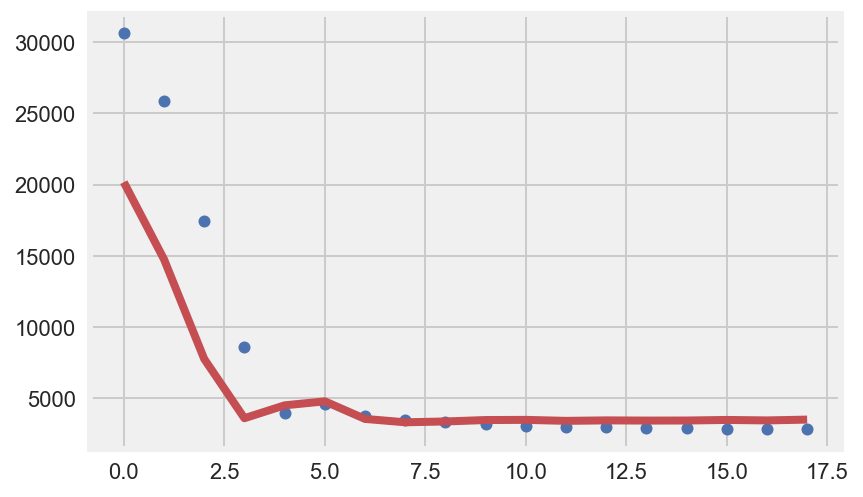

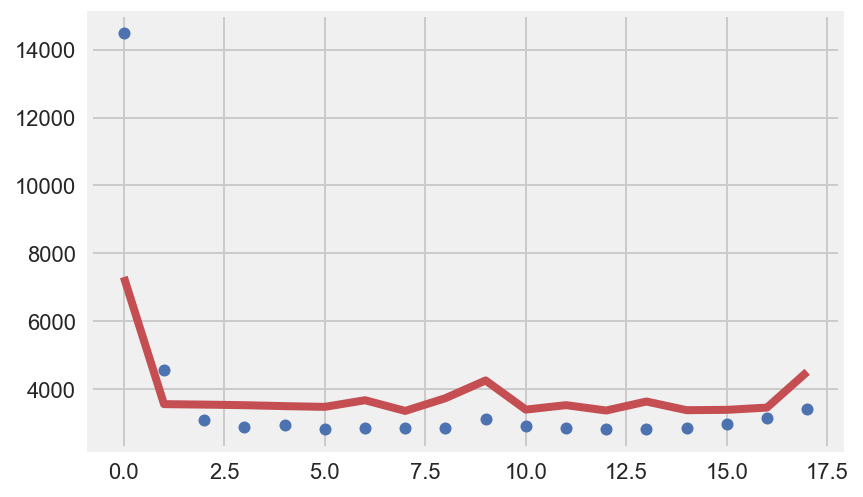

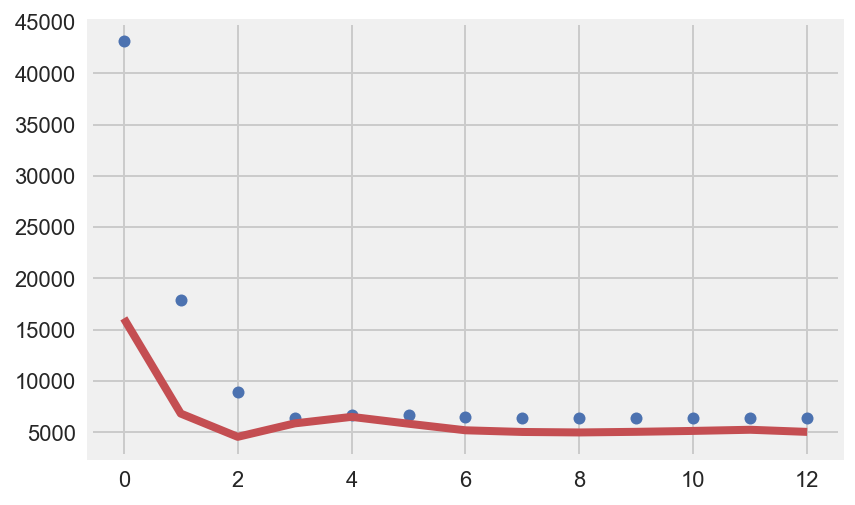

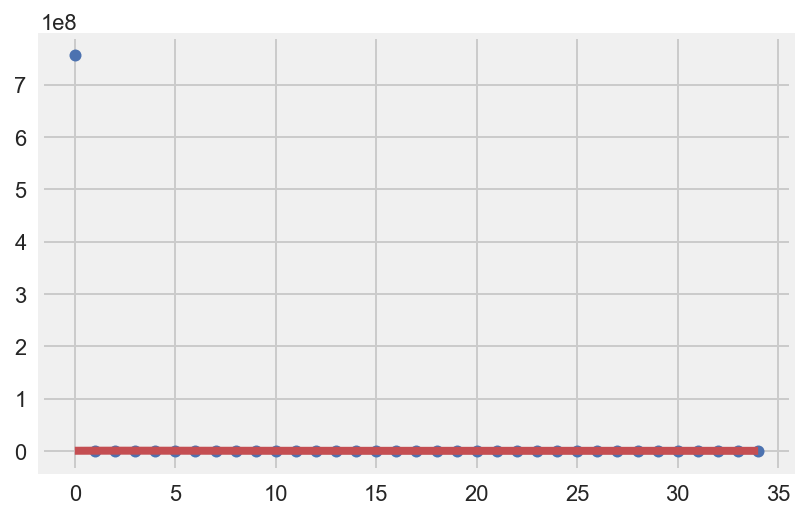

In [48]:
# Plots the results of a different learning rates for simple sequential model with 1 hidden layer

LR = [0.01, 0.1, 1, 10, 100]

for i in LR:
    #Define keras sequential model and its structure
    model = Sequential()
    model.add(Dense(16, input_shape=(10,), activation = 'relu'))
    model.add(Dense(1,))
    
    #Compile model
    model.compile(Adam(lr=i), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    # Instantiate 'EarlyStopping' function
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

    # Fits model over 100 iterations with 'earlystopper' callback, and assigns it to history
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,shuffle = True, verbose = 1, 
                    callbacks = [earlystopper])
    history_dict=history.history
    
    #Plot model's training loss and validation loss to check fitting
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')

Epoch 1/100
9/9 [==============================] - 2s 91ms/step - loss: 32718.5605 - mean_absolute_error: 162.0953 - val_loss: 22475.2930 - val_mean_absolute_error: 134.0554
Epoch 2/100
9/9 [==============================] - 0s 41ms/step - loss: 32399.3791 - mean_absolute_error: 160.5714 - val_loss: 22454.2324 - val_mean_absolute_error: 133.9771
Epoch 3/100
9/9 [==============================] - 0s 52ms/step - loss: 31692.5344 - mean_absolute_error: 160.5171 - val_loss: 22423.8477 - val_mean_absolute_error: 133.8657
Epoch 4/100
9/9 [==============================] - 0s 46ms/step - loss: 32082.9568 - mean_absolute_error: 160.1118 - val_loss: 22382.5078 - val_mean_absolute_error: 133.7141
Epoch 5/100
9/9 [==============================] - 1s 52ms/step - loss: 30701.9020 - mean_absolute_error: 155.5496 - val_loss: 22324.6445 - val_mean_absolute_error: 133.5015
Epoch 6/100
9/9 [==============================] - 0s 44ms/step - loss: 30812.8994 - mean_absolute_error: 156.7677 - val_loss: 222

9/9 [==============================] - 0s 32ms/step - loss: 26095.4898 - mean_absolute_error: 140.8146 - val_loss: 16804.8320 - val_mean_absolute_error: 110.9059
Epoch 6/100
9/9 [==============================] - 0s 50ms/step - loss: 25119.0066 - mean_absolute_error: 137.3250 - val_loss: 15367.9961 - val_mean_absolute_error: 104.2270
Epoch 7/100
9/9 [==============================] - 0s 49ms/step - loss: 21842.5252 - mean_absolute_error: 124.7167 - val_loss: 14044.0762 - val_mean_absolute_error: 97.6696
Epoch 8/100
9/9 [==============================] - 0s 41ms/step - loss: 19610.1721 - mean_absolute_error: 115.5496 - val_loss: 12809.6377 - val_mean_absolute_error: 91.1590
Epoch 9/100
9/9 [==============================] - 0s 48ms/step - loss: 19455.0445 - mean_absolute_error: 115.9063 - val_loss: 11672.7041 - val_mean_absolute_error: 85.1215
Epoch 10/100
9/9 [==============================] - 0s 52ms/step - loss: 19517.4256 - mean_absolute_error: 115.1703 - val_loss: 10630.7637 - val_

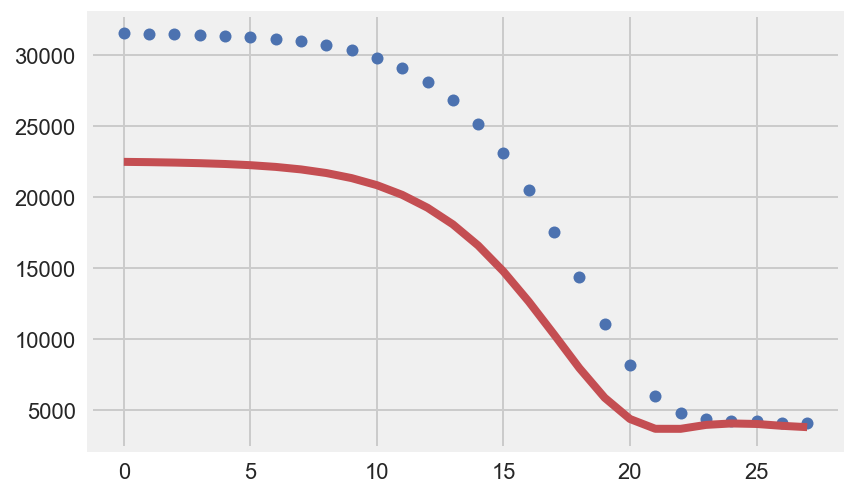

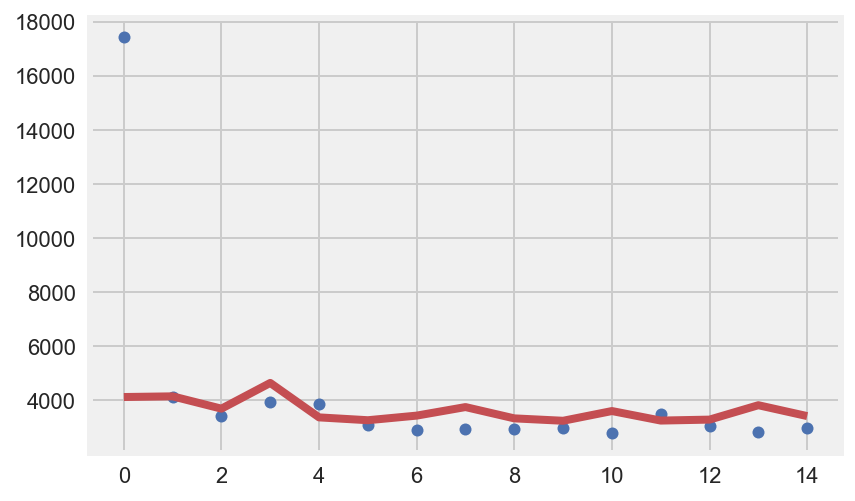

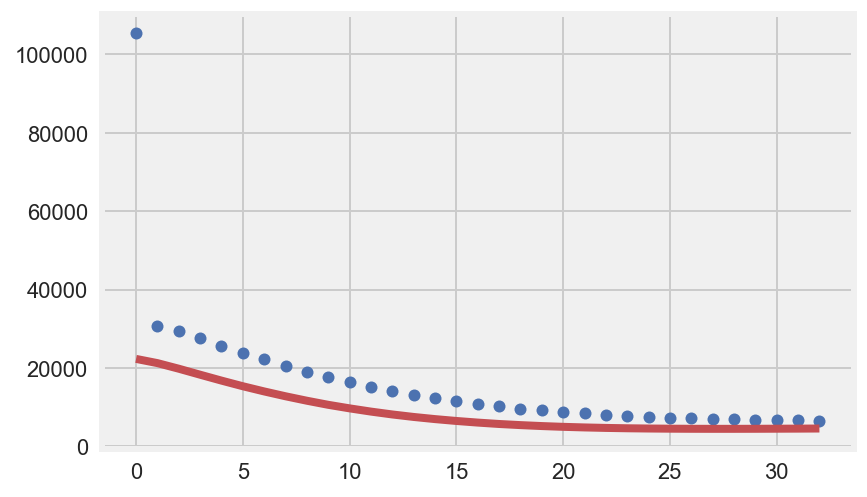

In [49]:
# Now we will use a fine tuned learning rate and a deeper neural network
LR = [0.001, 0.1, 1]

for i in LR:
    #Define keras sequential model and its structure
    model = Sequential()
    model.add(Dense(16, input_shape=(10,), activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(1,))
    
    #Compile model
    model.compile(Adam(lr=i), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    # Instantiate 'EarlyStopping' function
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

    # Fits model over 100 iterations with 'earlystopper' callback, and assigns it to history
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,shuffle = True, verbose = 1, 
                    callbacks = [earlystopper])
    history_dict=history.history
    
    #Plot model's training loss and validation loss to check fitting
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')

Epoch 1/100
9/9 [==============================] - 2s 104ms/step - loss: 32769.8637 - mean_absolute_error: 160.7964 - val_loss: 22453.3477 - val_mean_absolute_error: 133.9739
Epoch 2/100
9/9 [==============================] - 0s 46ms/step - loss: 30620.2750 - mean_absolute_error: 155.8386 - val_loss: 22381.5215 - val_mean_absolute_error: 133.7071
Epoch 3/100
9/9 [==============================] - 0s 48ms/step - loss: 32382.1437 - mean_absolute_error: 162.2099 - val_loss: 22228.5000 - val_mean_absolute_error: 133.1371
Epoch 4/100
9/9 [==============================] - 1s 60ms/step - loss: 32362.0707 - mean_absolute_error: 161.4752 - val_loss: 21901.6816 - val_mean_absolute_error: 131.9115
Epoch 5/100
9/9 [==============================] - 0s 49ms/step - loss: 31164.4768 - mean_absolute_error: 156.5380 - val_loss: 21218.3750 - val_mean_absolute_error: 129.3137
Epoch 6/100
9/9 [==============================] - 1s 59ms/step - loss: 27102.1453 - mean_absolute_error: 146.1750 - val_loss: 19

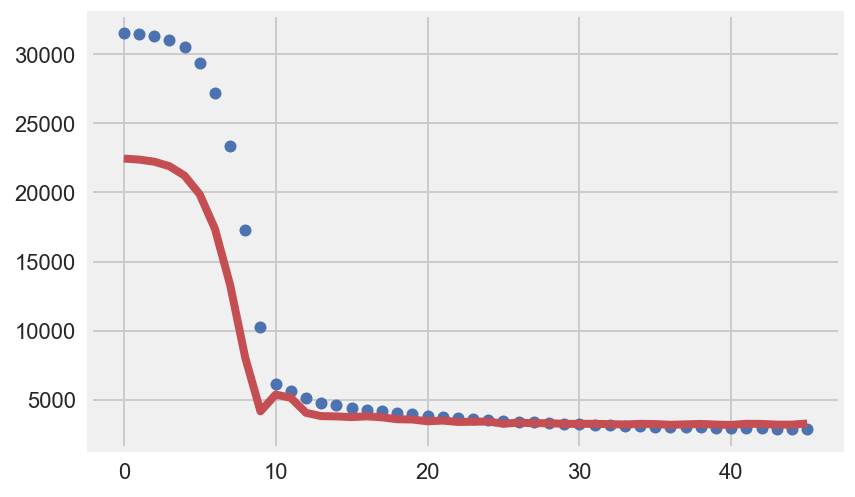

In [50]:
# Now we will fix learning rate at 0.001 and fine tune the neural network

#Define keras sequential model and its structure
model = Sequential()
model.add(Dense(16, input_shape=(10,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,))

#Compile model
model.compile(Adam(lr=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Instantiate 'EarlyStopping' function
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

# Fits model over 100 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,shuffle = True, verbose = 1, 
                callbacks = [earlystopper])
history_dict=history.history

#Plot model's training loss and validation loss to check fitting
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')

R2_Train:	0.51
MAE_Train:	44.33
MSE_Train:	2951.35
R2_Test:	0.46
MAE_Test:	42.90
MSE_Test:	2867.82


<Figure size 432x288 with 0 Axes>

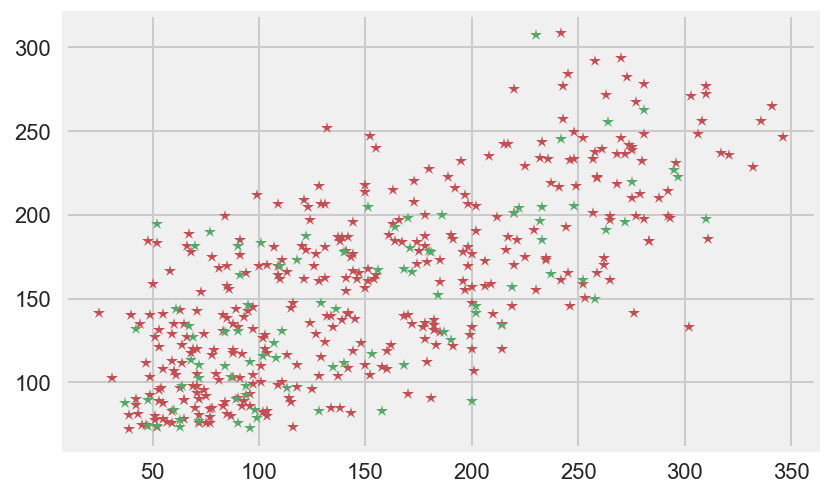

<Figure size 432x288 with 0 Axes>

In [52]:
# Make predictions with current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and prints performance metrics
print(f"R2_Train:\t{r2_score(y_train, y_train_pred):0.2f}")
print(f"MAE_Train:\t{mae(y_train, y_train_pred):0.2f}")
print(f"MSE_Train:\t{mse(y_train, y_train_pred):0.2f}")
print(f"R2_Test:\t{r2_score(y_test, y_test_pred):0.2f}")
print(f"MAE_Test:\t{mae(y_test, y_test_pred):0.2f}")
print(f"MSE_Test:\t{mse(y_test, y_test_pred):0.2f}")

plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()

## Achieved MAE 42.9 and MSE 2867 using neural networks, which is comparable to the results from sklearn and xgboost models